<a href="https://colab.research.google.com/github/Nik211885/machine_learning_quatity_water/blob/main/water_quatity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import sklearn.preprocessing as sklp
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [374]:
df = pd.read_csv('./water_potability.csv')

In [375]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
for label in df[df.columns[:-1]]:
  plt.hist(df[df['Potability']==1][label],label ='Drinkable',alpha = 0.7,density = True)
  plt.hist(df[df['Potability']==0][label],label ='Should Not Drink',alpha = 0.7,density = True)
  plt.xlabel(label)
  plt.ylabel('Potability')
  plt.legend()
  plt.show()

Dữ liệu không tuyến tính

#Xử lý dữ liệu

In [376]:
from sklearn.model_selection import train_test_split


Split data



In [377]:
#Lấp đầy các dữ liệu nan bằng 1 giá trị triung bình trên tập means trung bình trên tập
df.fillna(df.mean(), inplace=True)

# Lay ngau nhien 80% trong tap df lam tap huan luyện và 30 % test để đánh giá mô hình
train, test = train_test_split(df,train_size= 0.7)

In [386]:
def scale_data(dataframe,over = True):
  X = dataframe[dataframe.columns[:-1]]
  Y = dataframe[dataframe.columns[-1]]
  if(over):
    #Lấy mẫu sau cho cân bằng nhất
    r = RandomOverSampler()
    X,Y = r.fit_resample(X,Y)

  # Chuẩn hóa dữ liệu đầu vào
  scaler = sklp.StandardScaler()

  X = scaler.fit_transform(X)

  return X,Y

In [387]:
X_train, y_train = scale_data(train)
X_test, y_test = scale_data(test,over=False)

#Triển khai các mô hình

#Support Vector Machine Learning(SVM)

In [388]:
from sklearn.svm import SVC

In [389]:
svc_model =SVC()

In [390]:
svc_model.fit(X_train,y_train)

SVC()

In [391]:
y_pred =  svc_model.predict(X_test)

In [392]:
print(classification_report(y_test,y_pred))
acc_score = accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.70      0.71      0.71       595
           1       0.54      0.52      0.53       388

    accuracy                           0.64       983
   macro avg       0.62      0.62      0.62       983
weighted avg       0.64      0.64      0.64       983



Test kernel

In [393]:
acc_list = []
kernels = ['linear','poly','rbf','sigmoid']
for kernel in kernels:
  svc_test = SVC(kernel = kernel)
  svc_test.fit(X_train,y_train)
  y_pred = svc_test.predict(X_test)
  acc_test = accuracy_score(y_test,y_pred)
  acc_list.append(acc_test)
  if(acc_test > acc_score):
      acc_score = acc_test
      svc_model = svc_test
for i in range(len(acc_list)):
  print(f'{kernels[i]}: acc = {acc_list[i]}')

linear: acc = 0.5076297049847406
poly: acc = 0.5635808748728383
rbf: acc = 0.6388606307222787
sigmoid: acc = 0.47711088504577825


kernel = rbf(radius bais funtion) đang có mức hiệu suất tốt hơn

Change parameter C với kernel = rbf

In [394]:
C = np.arange(0.1,10,0.1)

In [395]:
acc_list =[]
c_g = None
for c in C:
  svc_test = SVC(C=c)
  svc_test.fit(X_train,y_train)
  y_pred = svc_test.predict(X_test)
  acc_test = accuracy_score(y_test,y_pred)
  acc_list.append(acc_test)
  if(acc_test>acc_score):
    acc_score = acc_test
    c_g = c
    svc_model = svc_test

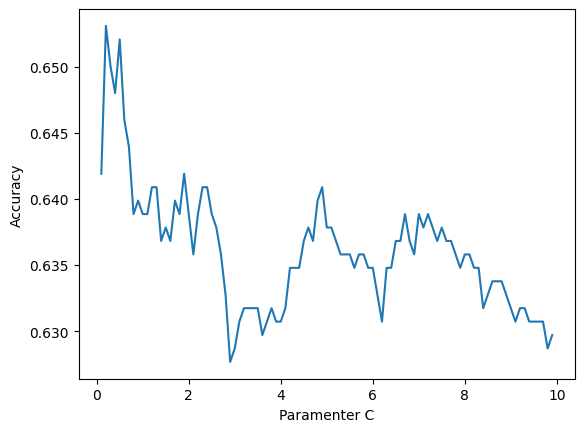

In [396]:
plt.plot(C,acc_list)
plt.xlabel('Paramenter C')
plt.ylabel('Accuracy')
plt.show()

#Logistic Classfictation

In [398]:
from sklearn.linear_model import LogisticRegression

In [399]:
lg_model = LogisticRegression()

In [400]:
lg_model.fit(X_train,y_train)

LogisticRegression()

In [401]:
y_pred = lg_model.predict(X_test)

In [402]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.50      0.54       595
           1       0.39      0.50      0.44       388

    accuracy                           0.50       983
   macro avg       0.50      0.50      0.49       983
weighted avg       0.52      0.50      0.50       983



#Navie Bayes

In [403]:
from sklearn.naive_bayes import GaussianNB

In [404]:
bayes_model = GaussianNB()

In [405]:
bayes_model.fit(X_train,y_train)

GaussianNB()

In [406]:
y_pred = bayes_model.predict(X_test)

In [407]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       595
           1       0.49      0.46      0.47       388

    accuracy                           0.60       983
   macro avg       0.57      0.57      0.57       983
weighted avg       0.59      0.60      0.59       983



#Perceptron

In [408]:
from sklearn.linear_model import Perceptron

In [409]:
per_model = Perceptron()

In [410]:
per_model.fit(X_train,y_train)

Perceptron()

In [411]:
y_pred = per_model.predict(X_test)

In [412]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.54      0.58       595
           1       0.42      0.52      0.47       388

    accuracy                           0.53       983
   macro avg       0.53      0.53      0.53       983
weighted avg       0.55      0.53      0.54       983



#Esemble Learning

In [413]:
from sklearn.ensemble import VotingClassifier

In [446]:
esem_model_list=[
    #('lr',lg_model),
    ('svc',svc_model),
    ('bas',bayes_model),
    #('per',per_model),
]

In [441]:
vc_model = VotingClassifier(estimators=esem_model_list,voting='hard')

In [442]:
vc_model.fit(X_train,y_train)

VotingClassifier(estimators=[('svc', SVC(C=0.2)), ('bas', GaussianNB())])

In [443]:
y_pred = vc_model.predict(X_test)

In [445]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.87      0.76       595
           1       0.63      0.34      0.44       388

    accuracy                           0.66       983
   macro avg       0.65      0.60      0.60       983
weighted avg       0.65      0.66      0.63       983

